# Web Scraping

---

In [1]:
from   bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import selenium

import splinter
from   splinter import Browser

# webdriver-manager is being phased out for Selenium >=4.6 (see docs)
import webdriver_manager

import datetime
from   importlib.metadata import version
import os
import platform as p
import sys

pad = 20
print(  f"\n{'Executed' : <{pad}} : {datetime.datetime.now().astimezone().strftime('%Y-%m-%d %H:%M:%S %z %Z')}"
        f"\n{'Platform' : <{pad}} : {p.platform(aliased = False, terse = False)}"
        f"\n{'Conda'    : <{pad}} : {os.environ['CONDA_DEFAULT_ENV'] or sys.executable.split('/')[-3]}"
        f"\n{'Python'   : <{pad}} : {p.python_implementation()} {p.python_version()} {sys.executable}")
print(*[f'{name : <{pad}} : {version(name)}'
        for name in ['BeautifulSoup4', 'Matplotlib', 'Pandas', 'Selenium', 'Splinter', 'webdriver-manager']], sep = '\n')


Executed             : 2023-09-01 01:14:48 -0400 EDT
Platform             : macOS-13.5.1-arm64-arm-64bit
Conda                : webscraping
Python               : CPython 3.10.12 /Users/df/anaconda3/envs/webscraping/bin/python
BeautifulSoup4       : 4.12.2
Matplotlib           : 3.7.2
Pandas               : 2.0.3
Selenium             : 4.12.0
Splinter             : 0.19.0
webdriver-manager    : 3.8.6


---

In [2]:
browser = Browser(driver_name = 'chrome',
                  headless    = False,
                  retry_count = 3)
browser

![](img/00.png)

In [3]:
url = 'https://static.bc-edx.com/data/web/mars_news/index.html'
browser.visit(url = url)

![](img/02.png)

In [4]:
html = browser.html
print(type(html))
print( len(html))

<class 'str'>
20301


In [5]:
soup = BeautifulSoup(markup   =  html,
                     features = 'html.parser')
type(soup)

bs4.BeautifulSoup

In [6]:
# scrape all divs with class `list_text`
divs = soup.find_all(name   = 'div',
                     class_ = 'list_text')
print(type(divs))
print( len(divs))
divs[0]

<class 'bs4.element.ResultSet'>
15


<div class="list_text">
<div class="list_date">November 9, 2022</div>
<div class="content_title">NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm</div>
<div class="article_teaser_body">For the first time in its eight years orbiting Mars, NASA’s MAVEN mission witnessed two different types of ultraviolet aurorae simultaneously, the result of solar storms that began on Aug. 27.</div>
</div>

In [7]:
print(type(divs[0]))
print(type(divs[0].find(name = 'div')))
print(type(divs[0].find(name = 'div', class_ = 'content_title')))
print(type(divs[0].find(name = 'div', class_ = 'content_title').text))

divs[0].find(name = 'div', class_ = 'content_title').text

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'str'>


"NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm"

In [8]:
news_items = []
for div in divs:
  title   = div.find(name = 'div', class_ = 'content_title').text
  preview = div.find(name = 'div', class_ = 'article_teaser_body').text
  news_item = {
    'title'   : title,
    'preview' : preview,
  }
  news_items.append(news_item)
news_items

[{'title': "NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm",
  'preview': 'For the first time in its eight years orbiting Mars, NASA’s MAVEN mission witnessed two different types of ultraviolet aurorae simultaneously, the result of solar storms that began on Aug. 27.'},
 {'title': "NASA Prepares to Say 'Farewell' to InSight Spacecraft",
  'preview': 'A closer look at what goes into wrapping up the mission as the spacecraft’s power supply continues to dwindle.'},
 {'title': 'NASA and ESA Agree on Next Steps to Return Mars Samples to Earth',
  'preview': 'The agency’s Perseverance rover will establish the first sample depot on Mars.'},
 {'title': "NASA's InSight Lander Detects Stunning Meteoroid Impact on Mars",
  'preview': 'The agency’s lander felt the ground shake during the impact while cameras aboard the Mars Reconnaissance Orbiter spotted the yawning new crater from space.'},
 {'title': 'NASA To Host Briefing on InSight, Mars Reconnaissance Orbiter Findings',


In [9]:
browser.quit()

---

In [10]:
browser = Browser(driver_name = 'chrome',
                  headless    = False,
                  retry_count = 3)
browser

![](img/00.png)

In [11]:
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url = url)

![](img/01.png)

In [12]:
html = browser.html
print(type(html))
print( len(html))

<class 'str'>
472808


In [13]:
soup = BeautifulSoup(markup   =  html,
                     features = 'html.parser')
type(soup)

bs4.BeautifulSoup

In [14]:
rows = soup.find_all(name   = 'tr',
                     class_ = 'data-row')
print(type(rows))
print( len(rows))
rows[0]

<class 'bs4.element.ResultSet'>
1867


<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

In [15]:
print(type(rows[0]))
print(type(rows[0].find_all(name='td')))
print(type(rows[0].find_all(name='td')[0]))
print(type(rows[0].find_all(name='td')[0].text))

rows[0].find_all('td')[0].text

<class 'bs4.element.Tag'>
<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>
<class 'str'>


'2'

In [16]:
list_of_rows = []
for row in rows:                  # for each <tr> Tag in the ResultSet of <tr> Tags...
  td  = row.find_all(name = 'td') # ...get a ResultSet of <td> Tags
  row = [col.text for col in td]  # extract the text of each <td> Tag in the ResultSet of <td> Tags into a list...
  list_of_rows.append(row)        # ...of lists
list_of_rows[:5]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

In [17]:
df = pd.DataFrame(data    = list_of_rows,
                  columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


---

## data types

In [18]:
df.dtypes # objects!

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
print(df.terrestrial_date[:2])
df.terrestrial_date = pd.to_datetime(arg = df.terrestrial_date)
print(df.terrestrial_date[:2])

0    2012-08-16
1    2012-08-17
Name: terrestrial_date, dtype: object
0   2012-08-16
1   2012-08-17
Name: terrestrial_date, dtype: datetime64[ns]


In [20]:
print(df.sol[:2])
df.sol = df.sol.astype(dtype = 'int')
print(df.sol[:2])

0    10
1    11
Name: sol, dtype: object
0    10
1    11
Name: sol, dtype: int64


In [21]:
print(df.ls[:2])
df.ls = df.ls.astype(dtype = 'int')
print(df.ls[:2])

0    155
1    156
Name: ls, dtype: object
0    155
1    156
Name: ls, dtype: int64


In [22]:
print(df.month[:2])
df.month = df.month.astype(dtype = 'int')
print(df.month[:2])

0    6
1    6
Name: month, dtype: object
0    6
1    6
Name: month, dtype: int64


In [23]:
print(df.min_temp[:2])
df.min_temp = df.min_temp.astype(dtype = 'float')
print(df.min_temp[:2])

0    -75.0
1    -76.0
Name: min_temp, dtype: object
0   -75.0
1   -76.0
Name: min_temp, dtype: float64


In [24]:
print(df.pressure[:2])
df.pressure = df.pressure.astype(dtype = 'float')
print(df.pressure[:2])

0    739.0
1    740.0
Name: pressure, dtype: object
0    739.0
1    740.0
Name: pressure, dtype: float64


In [25]:
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [26]:
df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [27]:
df.sol.nunique()

1867

---

## group bys

In [28]:
print(df.groupby(by = 'month'))
print(df.groupby(by = 'month')['min_temp'])

In [29]:
grouped = df.groupby(by = 'month')['min_temp']
grouped

In [30]:
for idx, frame in grouped:
  print(f'Month: {idx}')
  print('-' * 11)
  print(frame.nlargest(n = 3, keep = 'all'), end = '\n\n')

Month: 1
-----------
1582   -62.0
926    -63.0
931    -74.0
937    -74.0
Name: min_temp, dtype: float64

Month: 2
-----------
994    -76.0
1639   -76.0
1643   -76.0
1659   -76.0
Name: min_temp, dtype: float64

Month: 3
-----------
1729   -77.0
1730   -77.0
1711   -78.0
1718   -78.0
1744   -78.0
1756   -78.0
Name: min_temp, dtype: float64

Month: 4
-----------
1807   -77.0
1808   -77.0
1809   -77.0
1812   -77.0
1829   -77.0
1830   -77.0
Name: min_temp, dtype: float64

Month: 5
-----------
1232   -74.0
1239   -75.0
581    -76.0
587    -76.0
1213   -76.0
1230   -76.0
1234   -76.0
1236   -76.0
1853   -76.0
1854   -76.0
1856   -76.0
1857   -76.0
1858   -76.0
1864   -76.0
Name: min_temp, dtype: float64

Month: 6
-----------
39     -71.0
36     -72.0
1254   -72.0
1260   -72.0
Name: min_temp, dtype: float64

Month: 7
-----------
87     -65.0
86     -66.0
89     -66.0
1292   -66.0
Name: min_temp, dtype: float64

Month: 8
-----------
129   -63.0
95    -64.0
123   -64.0
127   -64.0
130   -64.0
13

In [31]:
grouped.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

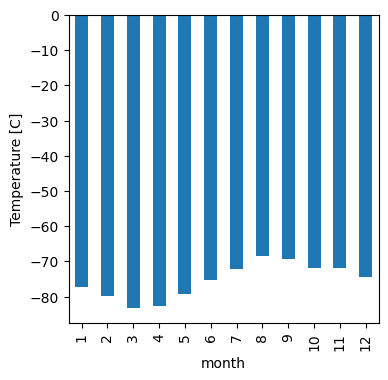

In [32]:
grouped.mean().plot(kind    = 'bar',
                    figsize = (4, 4));
plt.ylabel(ylabel = 'Temperature [C]');

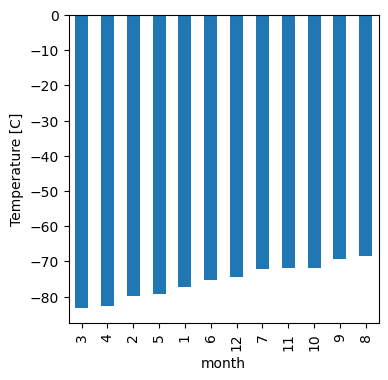

In [33]:
grouped.mean().sort_values().plot(kind    = 'bar',
                                  figsize = (4, 4));
plt.ylabel(ylabel = 'Temperature [C]');

In [34]:
pressure_by_month = df.groupby(by = 'month')['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

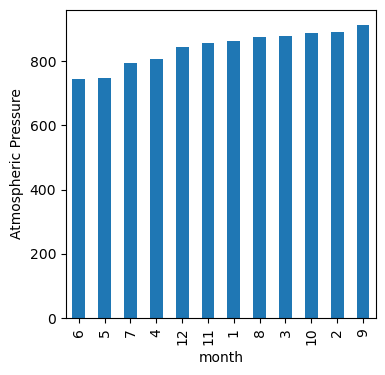

In [35]:
pressure_by_month.sort_values().plot(kind    = 'bar',
                                     figsize = (4, 4));
plt.ylabel(ylabel = 'Atmospheric Pressure');

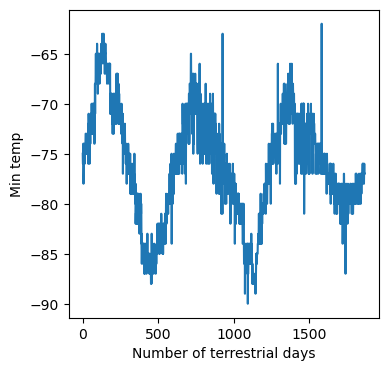

In [36]:
df.min_temp.plot(figsize = (4, 4));
plt.xlabel(xlabel = 'Number of terrestrial days');
plt.ylabel(ylabel = 'Min temp');

In [37]:
df.to_csv(path_or_buf = 'mars_data.csv',
          index       = False)

In [38]:
browser.quit()

---